In [1]:
%matplotlib widget
import ldm
import matplotlib.pylab as plt
from mayavi import mlab

In [12]:
#X_Ia, I_Li, fixed_dofs, control_dofs, w_max = ldm.test01_couple()
X_Ia, I_Li, fixed_dofs, control_dofs, w_max = ldm.test05_lattice()
#X_Ia, I_Li, fixed_dofs, control_dofs, w_max = ldm.test04_mgrid()

In [13]:
I_Li

array([[845, 686],
       [845, 751],
       [845, 488],
       ...,
       [567, 123],
       [123, 131],
       [131, 247]])

In [14]:
tes = ldm.LatticeTessellation(
    X_Ia=X_Ia,
    I_Li=I_Li
)

In [15]:
ldm_model = ldm.LDMModel(
    lattice_tessellation=tes,
    mats='elastic',
    fixed_dofs=fixed_dofs,
    control_dofs=control_dofs,
    w_max=-0.01
)

In [16]:
material_params = dict(
    E_T=1000, gamma_T=100, K_T=0, S_T=0.0005, c_T=1, bartau=3, 
    E_N=1000, S_N=0.001, c_N = 1, m = 0.01, f_t=3, f_c=20, f_c0=10, eta=0.0 # 0.5
)

In [17]:
#ldm_model.mats_.trait_set(**material_params);

In [18]:
ldm_model.domains[0][1];

In [19]:
ldm_model.hist.vis_record = {
    'Pw': ldm.LatticeRecord(),
    'eps':  ldm.Vis3DLattice(var='eps')
}

In [20]:
s = ldm_model.sim
s.tloop.verbose = True
s.tloop.k_max = 1000
s.tline.step = 0.5
s.tstep.fe_domain.serialized_subdomains

In [21]:
s.run()

t:	 0.00(0), 
	 0.50(1), 
	 1.00(1), 



In [29]:
import numpy as np
X_Ia = np.array(ldm_model.fe_domain[0].xmodel.X_Ia, dtype=np.float32)
I_Li = np.array(ldm_model.fe_domain[0].xmodel.I_Li, dtype=np.int_)

In [31]:
import numpy as np
import k3d
# k3d.points(X_Ia,point_size=0.02,
#             shader='3d', color=0x3f6bc5)
k3d.lines(X_Ia, I_Li,
              shader='mesh', width=0.0025,
              color=0xc6884b,
              model_matrix=(1.0, 0.0, 0.0, 0.0,
                            0.0, 0.0, 1.0, 0.0,
                            0.0, 1.0, 0.0, 0.0,
                            0.0, 0.0, 0.0, 1.0))


Output()

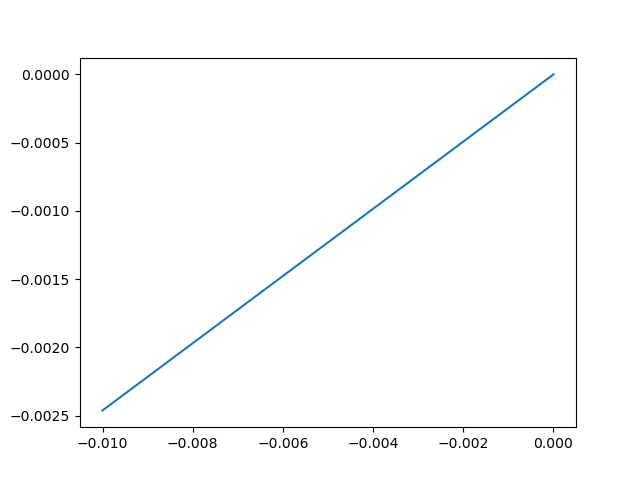

In [11]:
_, ax = plt.subplots(1,1)
P, w = ldm_model.hist['Pw'].Pw
ax.plot(w, P)

In [12]:
# mlab.options.backend = 'envisage'
# mlab.options.offscreen = False # 'envisage'
# f_strain = mlab.figure()
# scene = mlab.get_engine().scenes[-1]
# scene.name = 'strain'
# strain_viz = ldm.Viz3DLattice(vis3d=ldm_model.hist['eps'])
# strain_viz.setup()
# strain_viz.warp_vector.filter.scale_factor = 0.1
# strain_viz.plot(s.tstep.t_n)
# mlab.show()